# Python Intermedio - Práctica 7

![logo](https://www.belatrix.com/wp-content/uploads/2023/08/belatrix-logosweb-1.png)

## Montar un Servidor para consultar Reportes con Gráficas y Tablas

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:4000
 * Running on http://192.168.1.94:4000
Press CTRL+C to quit
127.0.0.1 - - [25/Jul/2025 18:49:17] "GET / HTTP/1.1" 200 -


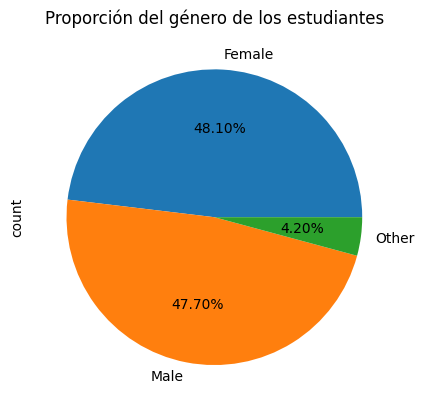

In [8]:
import numpy
import pandas

import matplotlib.pyplot as pyplot
import seaborn

from io import BytesIO
from base64 import b64encode

from flask import Flask

app = Flask(__name__)

@app.route("/")
def ruta_inicio():
    estudiantes = pandas.read_csv("student_habits_performance.csv")

    image = BytesIO()

    estudiantes["gender"].value_counts().plot.pie(autopct="%.2f%%")
    pyplot.title("Proporción del género de los estudiantes")
    pyplot.savefig(image, format="png")

    image.seek(0)
    base64 = b64encode(image.read()).decode(encoding="utf-8")

    tabla_estudiantes = estudiantes.to_html()

    return f"""
        <DOCTYPE html>
        <html lang="es">
            <head>
                <meta charset="utf-8" >
                <title>Reporte los hábitos de los estudiantes</title>
            </head>
            <body>
                <h1>Reporte los hábitos de los estudiantes</h1>

                <img src="data:image/png;base64,{base64}" >

                {tabla_estudiantes}
            </body>
        </html>
    """

app.run(host="0.0.0.0", port=4000)